In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Balloon Race Data Breaches - LATEST - breaches.csv')
df = data.copy()


#### Data Observation, Cleaning

In [24]:
df.head()

,organisation,alternative name,records lost,year,date,story,sector,method,interesting story,data sensitivity,displayed records,Unnamed: 11,source name,1st source link,2nd source link,ID
0,visualisation here: https://informationisbeaut...,NaN,"(use 3m, 4m, 5m or 10m to approximate unknown ...",year story broke,NaN,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,"=IF(C3>100000000,C3,"")",NaN,NaN,NaN,NaN,NaN
1,Plex,NaN,"15,000,000",2022,Aug 2022,"Intruders access password data, usernames, and...",web,hacked,NaN,1,NaN,NaN,Ars technica,https://arstechnica.com/information-technology...,NaN,418.0
2,Twitter,NaN,"5,400,000",2021,Dec 2021,Zero day vulnerability allowed a threat actor ...,web,hacked,NaN,2,NaN,NaN,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,NaN,419.0
3,Shanghai Police,NaN,"500,000,000",2022,Jul 2022,A database containing records of over a billio...,financial,hacked,NaN,5,"""one billion""",NaN,The Register,https://www.theregister.com/2022/07/05/shangha...,NaN,420.0
4,"City of Amagasaki, Japan",NaN,"500,000",2022,Jun 2022,An unnamed government official lost his bag af...,government,oops!,NaN,3,NaN,NaN,BBC,https://www.bbc.co.uk/news/world-asia-61921222,NaN,421.0


In [25]:
df.shape

(418, 16)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   organisation       418 non-null    object 
 1   alternative name   144 non-null    object 
 2   records lost       418 non-null    object 
 3   year               418 non-null    object 
 4   date               417 non-null    object 
 5   story              411 non-null    object 
 6   sector             418 non-null    object 
 7   method             418 non-null    object 
 8   interesting story  85 non-null     object 
 9   data sensitivity   417 non-null    object 
 10  displayed records  75 non-null     object 
 11  Unnamed: 11        0 non-null      float64
 12  source name        417 non-null    object 
 13  1st source link    416 non-null    object 
 14  2nd source link    32 non-null     object 
 15  ID                 417 non-null    float64
dtypes: float64(2), object(14)


In [27]:
df.describe()

,Unnamed: 11,ID
count,0.0,417.000000
mean,NaN,210.529976
std,NaN,121.231936
min,NaN,2.000000
25%,NaN,106.000000
50%,NaN,210.000000
75%,NaN,315.000000
max,NaN,421.000000


In [28]:
# remove the first error row

df = df.iloc[1:]

In [29]:
df['Unnamed: 11'].unique()

array([nan])

In [30]:
# drop unnecessary columns

df.drop(['Unnamed: 11', 'interesting story'], axis = 1, inplace= True)

In [31]:
# connect numeric case into string value

df['data sensitivity'] = pd.to_numeric(df['data sensitivity'], errors='coerce')

In [32]:
# renaming rows with proper case string

sensitivity_mapping = {
    1: "Just email address/Online information",
    2: "SSN/Personal details",
    3: "Credit card information",
    4: "Health & other personal records",
    5: "Full details"
}

df['data sensitivity'] = df['data sensitivity'].map(sensitivity_mapping)

In [33]:
# strip column value and convert data type into int, 'Int64' to handle NaNs

df['records lost'] = df['records lost'].str.replace('[^0-9]', '', regex=True)
df['records lost'] = pd.to_numeric(df['records lost'], errors='coerce').astype('Int64')  

In [34]:
print(df['records lost'].dtype) 

Int64


In [35]:
# strip column name and change data type into int

df.columns = df.columns.str.strip()

df['year'] = df['year'].astype(int)

In [36]:
# strip leading/trailing spacies to combined same row values

df['method'] = df['method'].str.strip()

#### EDA

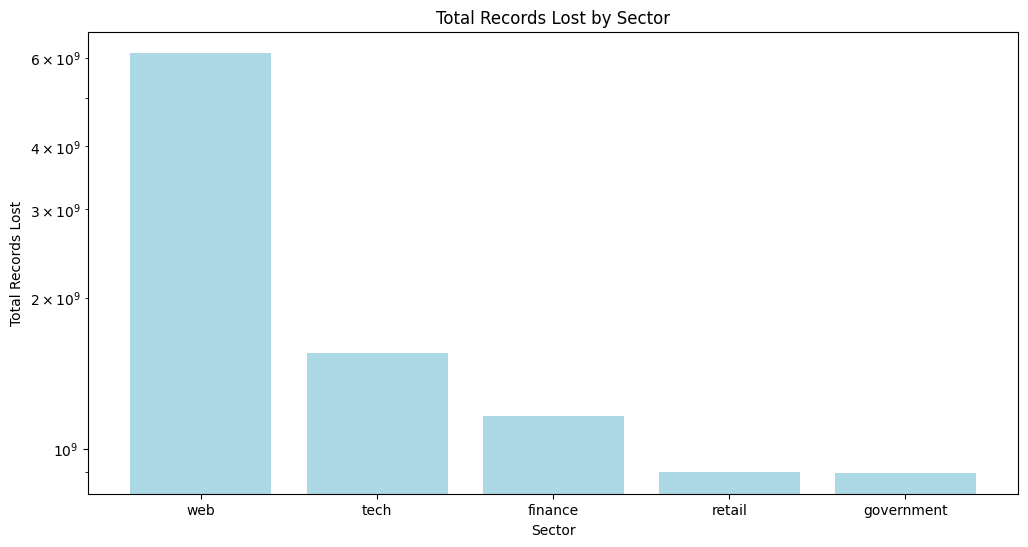

In [37]:
sector_totals = df.groupby('sector')['records lost'].sum().sort_values(ascending=False)
top_sectors = sector_totals.head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_sectors.index, top_sectors.values, color = 'lightblue')
plt.xlabel('Sector')
plt.ylabel('Total Records Lost')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Total Records Lost by Sector')
plt.show()


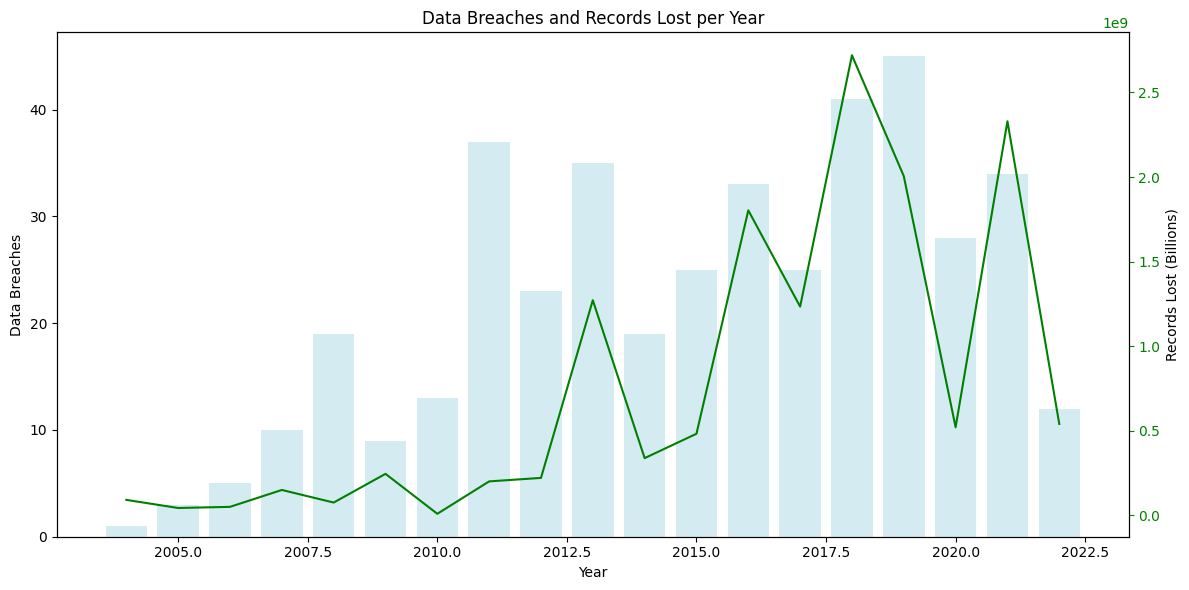

In [38]:
breach_records = df.groupby('year').agg({'organisation':'count', 'records lost':'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.bar(breach_records['year'], breach_records['organisation'], color = 'lightblue', alpha = 0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Data Breaches')

ax2 = ax1.twinx()
ax2.plot(breach_records['year'], breach_records['records lost'], color = 'green')
ax2.set_ylabel('Records Lost (Billions)')
ax2.tick_params(axis='y', colors='green')

plt.title('Data Breaches and Records Lost per Year')
plt.tight_layout()
plt.show()

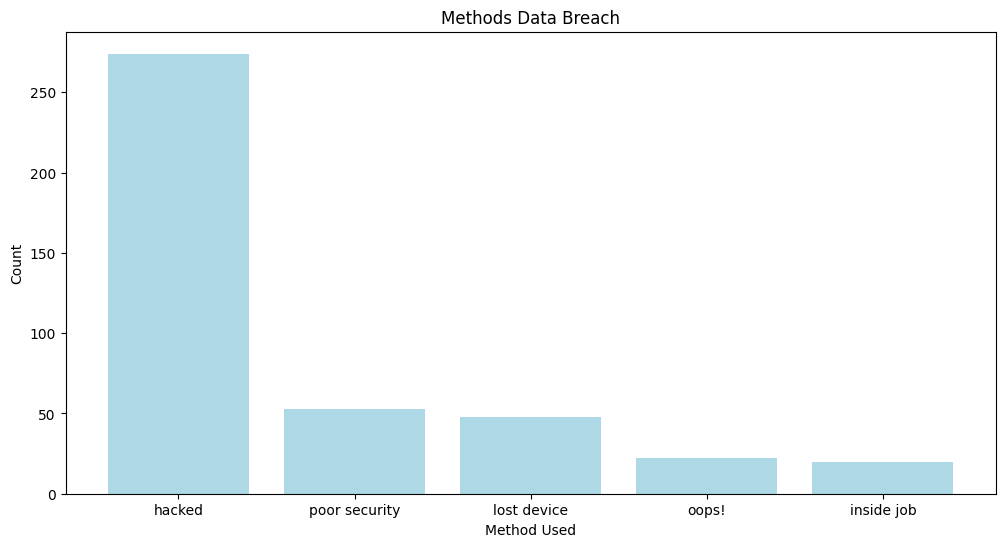

In [39]:
methods = df.groupby('method').size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)

plt.figure(figsize = (12, 6))
plt.bar(methods['method'], methods['count'], color = 'lightblue')
plt.xlabel('Method Used')
plt.ylabel('Count')
plt.title('Methods Data Breach')
plt.show()

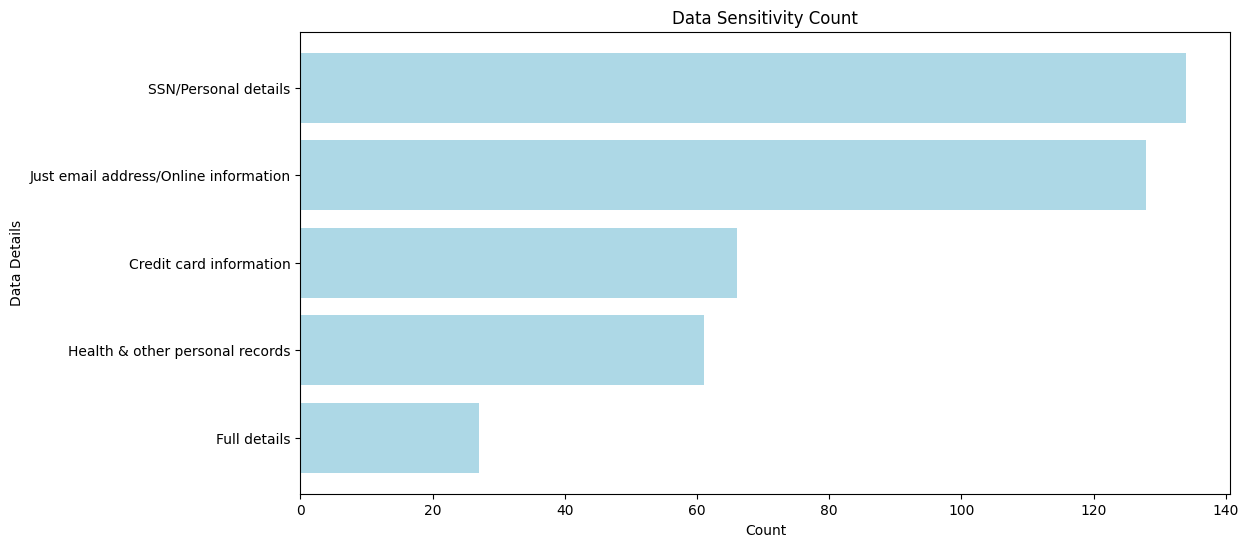

In [40]:
data_sensitivity = df.groupby('data sensitivity').size().reset_index( name = 'count').sort_values(by = 'count', ascending = True)

plt.figure(figsize = (12, 6))
plt.barh(data_sensitivity['data sensitivity'], data_sensitivity['count'], color = 'lightblue')
plt.xlabel('Count')
plt.ylabel('Data Details')
plt.title('Data Sensitivity Count')
plt.show()

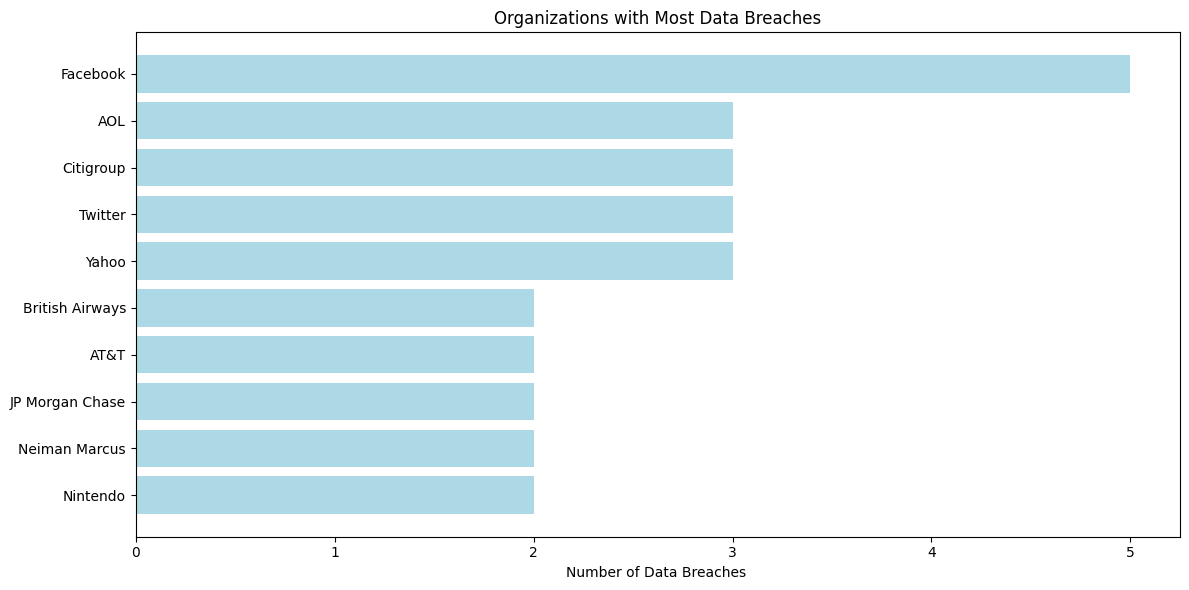

In [41]:
org_id = df.groupby('organisation').agg({'ID':'count'}).reset_index()
top_orgs = org_id.sort_values(by = 'ID', ascending = False)
top_orgs = top_orgs.head(10)

plt.figure(figsize = (12, 6))
plt.barh(top_orgs['organisation'], top_orgs['ID'], color = 'lightblue')
plt.xlabel('Number of Data Breaches ')
plt.title('Organizations with Most Data Breaches')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

C:\Users\berna\AppData\Local\Temp\ipykernel_1068\1018391091.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


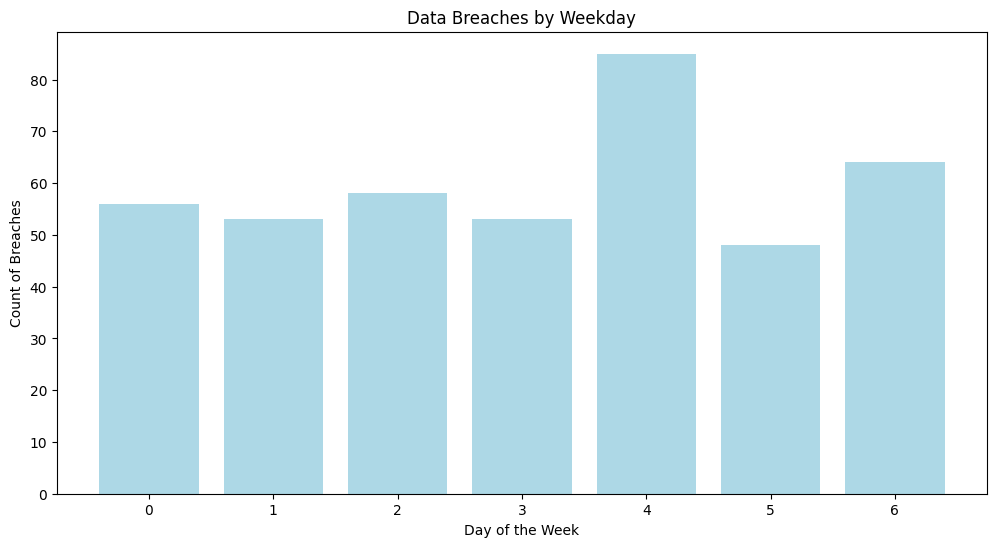

In [42]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['week'] = df['date'].dt.day_of_week
df_week = df.groupby('week').agg({'organisation': 'count'}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(df_week['week'], df_week['organisation'], color='lightblue')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Breaches')
plt.title('Data Breaches by Weekday')
plt.show()

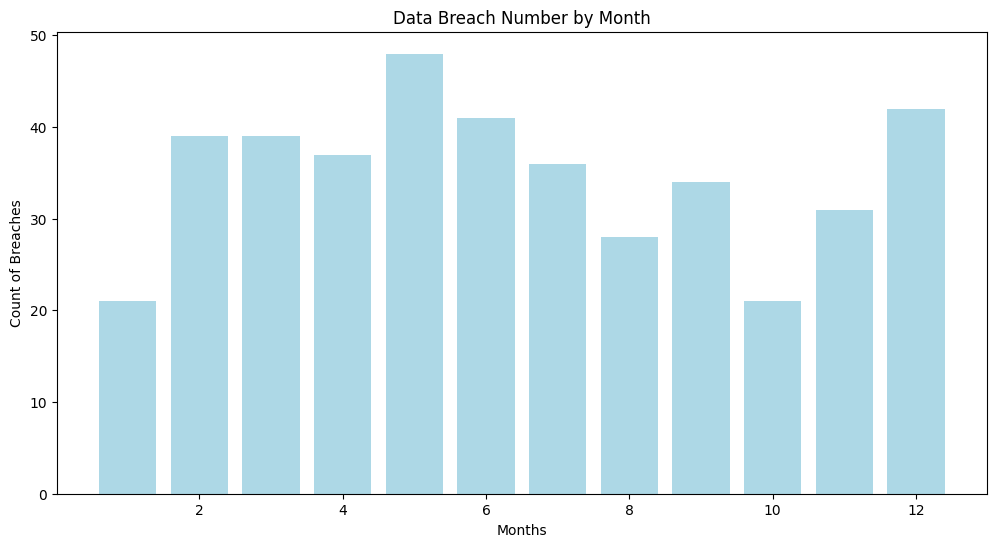

In [43]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
df_month = df.groupby('month').agg({'organisation': 'count'}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(df_month['month'], df_month['organisation'], color='lightblue')
plt.xlabel('Months')
plt.ylabel('Count of Breaches')
plt.title('Data Breach Number by Month')
plt.show()